# Basic Model

## Setup

In [3]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

In [4]:
%run setup.ipynb

## Model

In [5]:
# Load ResNet50
untrained_model = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model)

## Training

In [6]:
freeze_trained_model, info = train_model(model=untrained_model, optimizer=optimizer, num_epoch=40, train=dataloader_train)

Epoch 1/40
----------
Train Loss: 1.8324 Acc: 0.4275
Val Loss: 1.6740 Acc: 0.7404
Epoch time 2m 42s
----------

Epoch 2/40
----------
Train Loss: 1.5329 Acc: 0.8072
Val Loss: 1.3830 Acc: 0.9038
Epoch time 2m 39s
----------

Epoch 3/40
----------
Train Loss: 1.2975 Acc: 0.8970
Val Loss: 1.1886 Acc: 0.9038
Epoch time 2m 44s
----------

Epoch 4/40
----------
Train Loss: 1.1150 Acc: 0.9150
Val Loss: 1.0264 Acc: 0.8942
Epoch time 2m 38s
----------

Epoch 5/40
----------
Train Loss: 0.9791 Acc: 0.9281
Val Loss: 0.8918 Acc: 0.9231
Epoch time 2m 35s
----------

Epoch 6/40
----------
Train Loss: 0.8807 Acc: 0.9365
Val Loss: 0.8019 Acc: 0.9231
Epoch time 2m 36s
----------

Epoch 7/40
----------
Train Loss: 0.7925 Acc: 0.9389
Val Loss: 0.7381 Acc: 0.9423
Epoch time 2m 36s
----------

Epoch 8/40
----------
Train Loss: 0.7183 Acc: 0.9461
Val Loss: 0.7376 Acc: 0.9519
Epoch time 2m 35s
----------

Epoch 9/40
----------
Train Loss: 0.6649 Acc: 0.9413
Val Loss: 0.7040 Acc: 0.9423
Epoch time 2m 35s
----

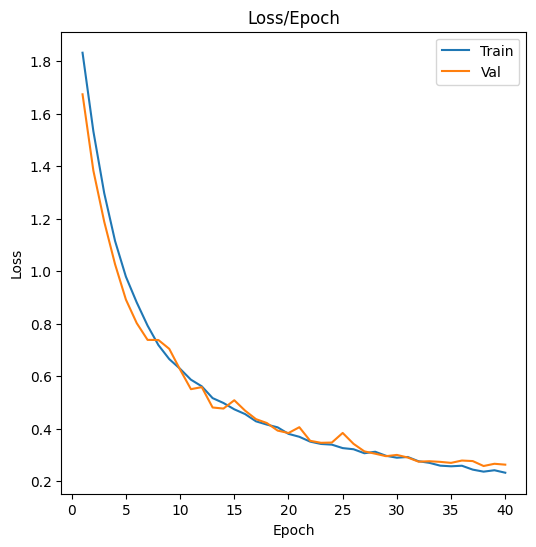

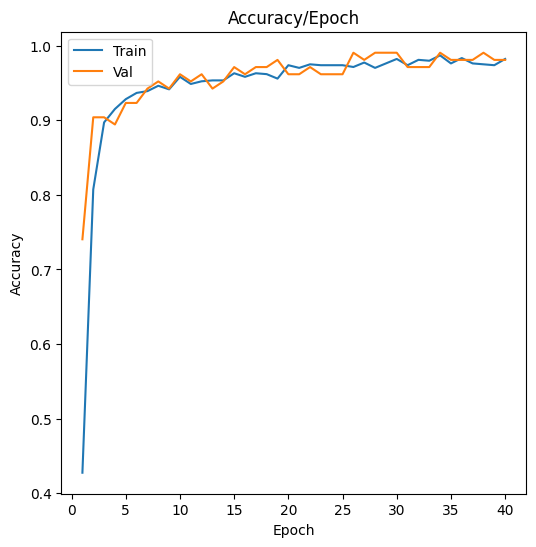

In [7]:
# Plot Loss
plot_loss(info["train_loss"], info["val_loss"], ["Train", "Val"])

# Plot Accuracy
plot_accuracies(info["train_acc"], info["val_acc"], ["Train", "Val"])

In [8]:
unfreeze_layers(freeze_trained_model)
model, model_info = train_model(model=freeze_trained_model, optimizer=optimizer, num_epoch=40, train=dataloader_train)

Epoch 1/40
----------
Train Loss: 0.2011 Acc: 0.9701
Val Loss: 0.1578 Acc: 0.9712
Epoch time 3m 39s
----------

Epoch 2/40
----------
Train Loss: 0.0868 Acc: 0.9892
Val Loss: 0.1021 Acc: 0.9808
Epoch time 3m 34s
----------

Epoch 3/40
----------
Train Loss: 0.0538 Acc: 0.9940
Val Loss: 0.0953 Acc: 0.9904
Epoch time 3m 36s
----------

Epoch 4/40
----------
Train Loss: 0.0332 Acc: 1.0000
Val Loss: 0.0799 Acc: 0.9808
Epoch time 3m 35s
----------

Epoch 5/40
----------
Train Loss: 0.0283 Acc: 0.9976
Val Loss: 0.0673 Acc: 0.9904
Epoch time 3m 34s
----------

Epoch 6/40
----------
Train Loss: 0.0176 Acc: 1.0000
Val Loss: 0.0670 Acc: 0.9904
Epoch time 3m 35s
----------

Epoch 7/40
----------
Train Loss: 0.0150 Acc: 0.9988
Val Loss: 0.0669 Acc: 0.9904
Epoch time 3m 34s
----------

Epoch 8/40
----------
Train Loss: 0.0126 Acc: 1.0000
Val Loss: 0.0672 Acc: 0.9904
Epoch time 3m 36s
----------

Epoch 9/40
----------
Train Loss: 0.0138 Acc: 1.0000
Val Loss: 0.0637 Acc: 0.9904
Epoch time 3m 35s
----

## Results

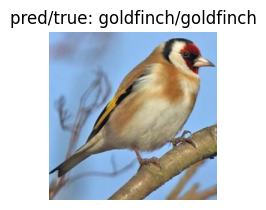

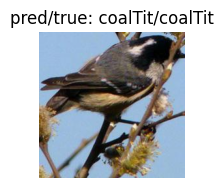

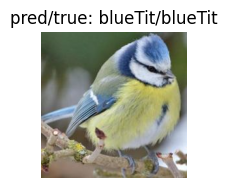

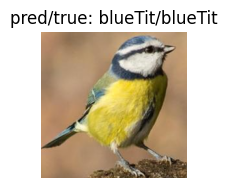

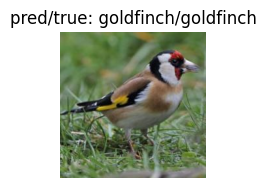

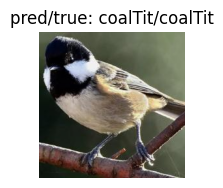

In [9]:
visualize_model(model, dataloader_validation, class_labels, device)

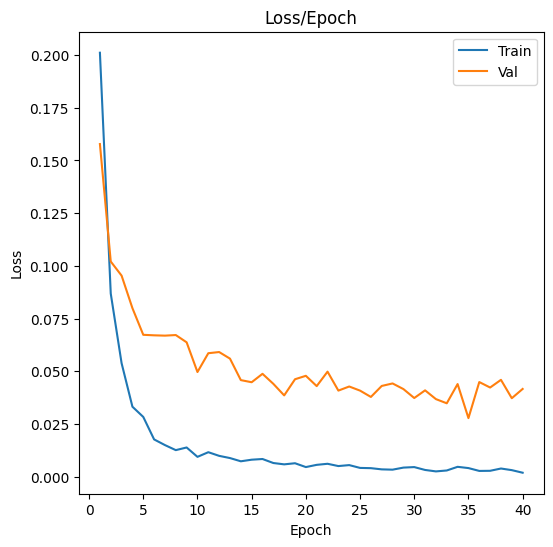

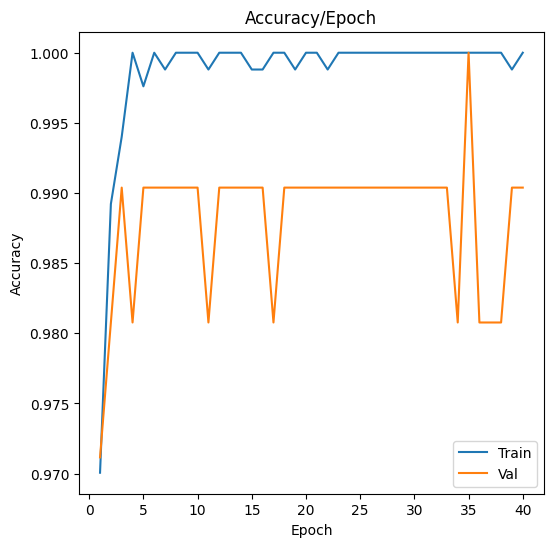

In [10]:
# Plot Loss
plot_loss(model_info["train_loss"], model_info["val_loss"], ["Train", "Val"])

# Plot Accuracy
plot_accuracies(model_info["train_acc"], model_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  2  0 13  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 98.09523809523809


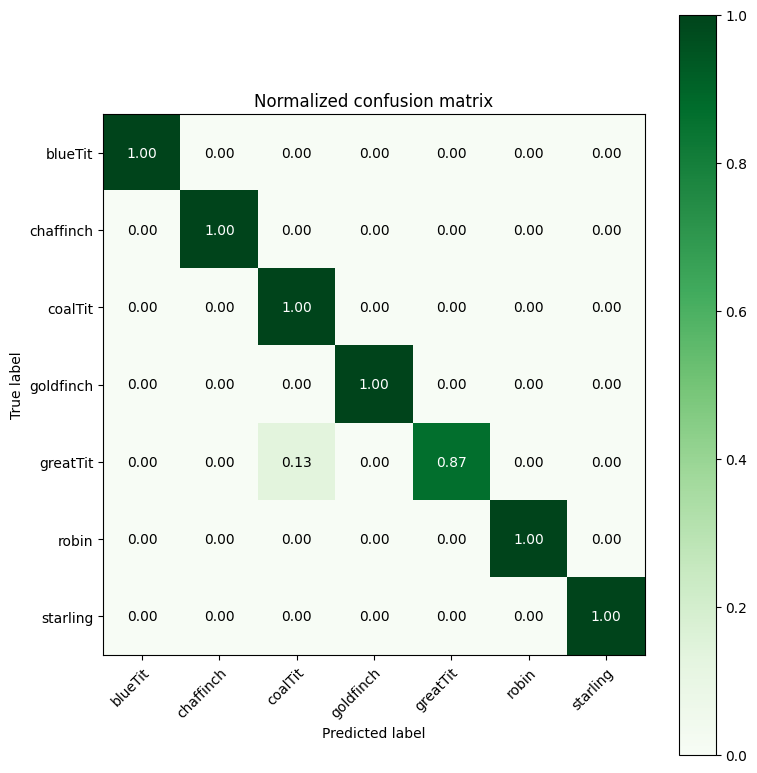

In [11]:
truel, predl = makeAll(dataloader_test, model, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [12]:
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.88      1.00      0.94        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.87      0.93        15
       robin       1.00      1.00      1.00        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

